**Load Necessary Libraries**

In [1]:
!pip install markovify

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 4.9 MB/s eta 0:00:00
  Created wheel for markovify: filename=markovify-0.9.4-py3-none-any.whl size=18607 sha256=1ad28418bce0a4995e5beb7ada930e2e79061259781f59be6892f3f68c797cf9
  Stored in directory: /root/.cache/pip/wheels/ca/8c/c5/41413e24c484f883a100c63ca7b3b0362b7c6f6eb6d7c9cc7f
Successfully built markovify


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
!pip install surprise
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# CountVectorizer+tfidfTransformer = tfidfVectorizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate
from bokeh.io import show,curdoc,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,HoverTool,Select,Paragraph,TextInput
from ipywidgets import interact
from sklearn.model_selection import train_test_split
import markovify
import string
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from sklearn.pipeline import Pipeline

import seaborn as sns


import requests
from bs4 import BeautifulSoup
import pandas as pd


from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import warnings; warnings.simplefilter('ignore')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sklearn.model_selection import train_test_split
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report

import pandas as pd
from sklearn.model_selection import train_test_split
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Reader, Dataset, SVD
from operator import itemgetter
import ipywidgets as widgets
from IPython.display import display

from wordcloud import WordCloud
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811595 sha256=a33fa5670f3cdbd4f9ed0415f589ec5d341b3ffcb789f881e9112b8a40f8876f
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**Fetching Data**

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# List of URLs
urls = [
    "https://beminimalist.co/products/oat-extract-06-gentle-cleanser?_pos=2&_fid=4a0fb6bfa&_ss=c",
    "https://beminimalist.co/products/aquaporin-booster-05-cleanser?_pos=3&_fid=7872934a0&_ss=c",
    "https://beminimalist.co/products/pha-3-biotic-toner?_pos=1&_fid=f999ea85f&_ss=c",
    "https://beminimalist.co/products/glycolic-acid-08-exfoliating-liquid?_pos=2&_fid=3f163dd53&_ss=c",
    "https://beminimalist.co/products/salicylic-lha-2-cleanser?_pos=1&_fid=895fff9e3&_ss=c",
    "https://beminimalist.co/products/sepicalm-3-oat-moisturiser?_pos=1&_fid=9e574c43d&_ss=c",
    "https://beminimalist.co/products/vitamin-b5-10-moisturizer?_pos=2&_fid=f0eb6d6bf&_ss=c",
    "https://beminimalist.co/products/marula-05-moisturizer?_pos=3&_fid=f0eb6d6bf&_ss=c",
    "https://beminimalist.co/products/ceramides-0-3-madecassoside?_pos=5&_fid=f0eb6d6bf&_ss=c",
    "https://beminimalist.co/products/ceramides-0-3-bisabolol?_pos=6&_fid=f0eb6d6bf&_ss=c",
    "https://beminimalist.co/products/alpha-arbutin-2?_pos=1&_fid=722dd16ff&_ss=c",
    "https://beminimalist.co/products/salicylic-acid-2?_pos=2&_fid=e49d19e4f&_ss=c",
    "https://beminimalist.co/products/vitamin-c-ethyl-ascorbic-acid-10-acetyl-glucosamine-1?_pos=3&_fid=e49d19e4f&_ss=c",
    "https://beminimalist.co/products/niacinamide-10-with-matmarine?_pos=4&_fid=e49d19e4f&_ss=c",
    "https://beminimalist.co/products/2-hyaluronic-acid?_pos=5&_fid=e49d19e4f&_ss=c",
    "https://beminimalist.co/products/niacinamide-5-hyaluronic-acid-1?_pos=6&_fid=e49d19e4f&_ss=c",
    "https://beminimalist.co/products/retinol-0-3-q10?_pos=7&_fid=e49d19e4f&_ss=c",
    "https://beminimalist.co/products/tranexamic-3-hpa?_pos=1&_psq=tr&_ss=e&_v=1.0",
    "https://beminimalist.co/products/vitamin-c-e-ferulic-16?_pos=9&_fid=e49d19e4f&_ss=c",
    "https://beminimalist.co/products/multi-peptide-serum-7-matrixyl-3000-3-bio-placenta?_pos=10&_fid=e49d19e4f&_ss=c",
    "https://beminimalist.co/products/retinol-0-6?_pos=11&_fid=e49d19e4f&_ss=c",
    "https://beminimalist.co/products/multi-vitamin-spf-50?_pos=4&_fid=1c5a34e2e&_ss=c",
    "https://beminimalist.co/products/spf-60-silymarin?_pos=16&_fid=1c5a34e2e&_ss=c",
    "https://beminimalist.co/products/spf-50-sunscreen-stick?_pos=22&_fid=1c5a34e2e&_ss=c",
    "https://beminimalist.co/products/invisible-spf-40-sunscreen?_pos=35&_fid=913cc80c9&_ss=c",
    "https://beminimalist.co/products/alpha-lipoic-glycolic-07-cleanser?_pos=2&_psq=alp&_ss=e&_v=1.0"
]

# Create empty lists to store the extracted data
data = []

# Iterate through each URL
for url in urls:
    # Send a GET request to the website
    response = requests.get(url)

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Extract the product name
    product_name = soup.find("h1", class_="product__title").text.strip()

    # Extract the customer information
    informations = soup.find_all("div", class_="oke-w-reviewMinimal-reviewer")

    # Extract the customer reviews
    reviews = soup.find_all("li", class_="oke-w-reviews-list-item")

    # Iterate through each review and extract the required information
    for review, info in zip(reviews, informations):
        # Extract the review text
        review_text = review.find("div", class_="oke-reviewContent-body oke-bodyText").text.strip()

        # Extract the customer name
        customer_name = info.find("span", class_="oke-w-reviewer-name").text.strip()

        # Extract the age_range
        age_range = review.find_all('span', class_="oke-w-selectAttr-item-value")[1].text.strip()

        # Scrape customer skin type and skin concern
        skin_type = review.find_all('span', class_="oke-w-selectAttr-item-value")[0].text.strip()
        skin_concern = review.find_all('span', class_="oke-w-selectAttr-item-value")[2].text.strip()

        # Extract the rating
        rating_element = review.find("span", class_="oke-a11yText")
        rating = rating_element.text.strip() if rating_element else "No rating"

        # Append the extracted information to the data list
        data.append({
            "Product Name": "Minimalist " + product_name,  # Add "Minimalist" before the product name
            "Customer Name": customer_name,
            "Age Range": age_range,
            "Skin Type": skin_type,
            "Skin Concern": skin_concern,
            "Review": review_text,
            "Rating": rating})

# Create a DataFrame from the extracted data
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('Customer Reviews1.csv', index=False)

# Print the DataFrame
print(df)

                                        Product Name  Customer Name Age Range  \
0         Minimalist Oat Extract 06% Gentle Cleanser      ANIKET D.   18 - 24   
1         Minimalist Oat Extract 06% Gentle Cleanser     Shadabh K.   35 - 44   
2         Minimalist Oat Extract 06% Gentle Cleanser    Khushboo S.   18 - 24   
3         Minimalist Oat Extract 06% Gentle Cleanser        Neha S.   25 - 34   
4         Minimalist Oat Extract 06% Gentle Cleanser     Drishti S.   18 - 24   
..                                               ...            ...       ...   
125  Minimalist Alpha Lipoic + Glycolic 07% Cleanser       Riitu S.   25 - 34   
126  Minimalist Alpha Lipoic + Glycolic 07% Cleanser        Tanu p.   25 - 34   
127  Minimalist Alpha Lipoic + Glycolic 07% Cleanser      Ankita P.   25 - 34   
128  Minimalist Alpha Lipoic + Glycolic 07% Cleanser        Mohd M.   18 - 24   
129  Minimalist Alpha Lipoic + Glycolic 07% Cleanser  Divyashree N.   35 - 44   

       Skin Type           

**Loading And Merging Data**

In [4]:
#Load data from the uploaded Excel file (Minitrial.xlsx)
try:
    df_minitrial = pd.read_excel("Minitrial.xlsx")

    # Print first few rows of the DataFrame to verify the data
    print("Minitrial DataFrame:")
    print(df_minitrial.head())

except FileNotFoundError:
    print("Minitrial.xlsx file not found. Please check the file name and path.")

# Load data from the uploaded CSV file (Customer Reviews.csv)
try:
    df_customer_reviews = pd.read_excel("CustomerReviews.xlsx")
    # Print first few rows of the DataFrame to verify the data
    print("\nCustomer Reviews DataFrame:")
    print(df_customer_reviews.head())

except FileNotFoundError:
    print("Customer Reviews.csv file not found. Please check the file name and path.")

# Load data from the uploaded CSV file (Ingredients.xlsx)
ingredients_df = pd.read_excel("Ingredients.xlsx")
# Print first few rows of the DataFrame to verify the data
print("\nIngredients DataFrame:")
print(ingredients_df.head())

Minitrial DataFrame:
                                         ProductName ProductType  Price  \
0    Minimalist Alpha Lipoic + Glycolic 07% Cleanser    Cleanser   5.26   
1          Minimalist Aquaporin Booster 05% Cleanser    Cleanser   3.90   
2         Minimalist Oat Extract 06% Gentle Cleanser    Cleanser   3.90   
3  Minimalist Salicylic Acid + LHA  02% Face Clea...    Cleanser   4.04   
4  Minimalist Glycolic Acid 08% Exfoliating Liqui...       Toner   6.74   

                                              Target  \
0   For brightening skin tone & evening skin texture   
1       Stimulates hydration & cleans without drying   
2  Gentle, low-foaming cleanser for damaged, sens...   
3  Reduces Sebum & Prevents Breakout Without Dryi...   
4  Deep Exfoliation For Even Skin Tone, Texture &...   

                                       TargetConcern     SuitableFor  \
0  Dullness   Uneven tone   Rough skin Uneven tex...  All Skin Types   
1        Dryness   Dehydrated skin  Skin tightn

**Hybrid Recommendation System**

In [5]:
# Preprocess the 'ProductType' column
df_minitrial['ProductType'] = df_minitrial['ProductType'].map(lambda x: x.replace('|', ' '))

# Convert columns to string type
df_minitrial[['ProductType', 'Target', 'SuitableFor', 'ProductStudy', 'Ingredients']] = df_minitrial[['ProductType', 'Target', 'SuitableFor', 'ProductStudy', 'Ingredients']].astype(str)

# Concatenate the text columns into a single column 'CombinedFeatures'
text_cols = ['ProductType', 'Target', 'SuitableFor', 'ProductStudy', 'Ingredients']
df_minitrial['CombinedFeatures'] = df_minitrial[text_cols].apply(lambda x: ' '.join(x.dropna()), axis=1)

# Initialize the CountVectorizer for 'CombinedFeatures'
count_combined = CountVectorizer(stop_words='english')
count_matrix_combined = count_combined.fit_transform(df_minitrial['CombinedFeatures'])

# Compute the cosine similarity based on 'CombinedFeatures'
cosine_sim_combined = cosine_similarity(count_matrix_combined, count_matrix_combined)

# Define lists of skin concerns for each skin type
skin_concerns = {
    "Dry": ["Dryness", "Dullness", "Flakiness", "Sensitivity", "Tightness", "Fine Lines and Wrinkles", "Skin Texture", "Cracking", "Redness", "Peeling", "Eczema", "Dermatitis", "Sagging", "Sun Damage"],
    "Oily": ["Excess Sebum Production", "Blackheads and Whiteheads", "Acne", "Enlarged Pores", "Blemishes","Congestion", "Uneven Skin Tone", "Sweaty", "Acne Scarring", "Texture", "Textural irregularities", "Antioxidant support"],
    "Combination": ["T-Zone Oiliness", "Patches", "Signs of aging", "Balancing"]
}

# Function to get content-based recommendations
def get_content_based_recommendations(product_type, top_n=10):
    idx = df_minitrial[df_minitrial['ProductType'].str.contains(product_type, case=True)].index
    sim_scores = cosine_similarity(count_matrix_combined[idx], count_matrix_combined)
    sim_scores_sum = sim_scores.sum(axis=0)
    similar_indices = sim_scores_sum.argsort()[::-1]
    top_similar_indices = [i for i in similar_indices if i not in idx][:top_n]
    return df_minitrial['ProductName'].iloc[top_similar_indices]

# Define svd object outside the function
svd = SVD()

# Function to get collaborative filtering recommendations
def get_collaborative_filtering_recommendations(customer_name, top_n=10):
    ratings = pd.read_excel("CustomerReviews.xlsx")
    reader = Reader(rating_scale=(0.5, 5))
    train_data_surprise = Dataset.load_from_df(ratings[['CustomerName', 'ProductName', 'IndividualRating']], reader)
    trainset = train_data_surprise.build_full_trainset()
    svd.fit(trainset)  # Fit the svd model
    all_products = list(df_minitrial['ProductName'].unique())
    predicted_ratings = [(product, svd.predict(customer_name, product).est) for product in all_products]
    predicted_ratings.sort(key=itemgetter(1), reverse=True)
    top_n_products = [product for product, _ in predicted_ratings[:top_n]]
    return top_n_products


# Function to get content-based recommendations based on skin concern
def get_content_based_recommendations_by_skin_concern(skin_concern, top_n=10):
    matching_products = df_customer_reviews[df_customer_reviews['SkinConcern'].str.contains(skin_concern, na=False, case=False)]
    unique_products = matching_products['ProductName'].unique()
    return unique_products[:top_n]

# Function to calculate Mean Absolute Error (MAE)
def calculate_mae(predicted_ratings, actual_ratings):
    return np.abs(np.array(predicted_ratings) - np.array(actual_ratings)).mean()

# Function to calculate Root Mean Squared Error (RMSE)
def calculate_rmse(predicted_ratings, actual_ratings):
    return np.sqrt(((np.array(predicted_ratings) - np.array(actual_ratings)) ** 2).mean())

# Function to calculate coverage
def calculate_coverage(recommendations, total_products):
    return len(set(recommendations)) / total_products

# Function to calculate user satisfaction
def calculate_user_satisfaction(recommendations, actual_ratings):
    satisfied_users = [actual_ratings[product] >= 4 for product in recommendations]
    return sum(satisfied_users) / len(satisfied_users)

# Function to generate hybrid recommendations with user-specific constraints
def hybrid_recommendations(customer_name, skin_concern, skin_type, top_n=10, weights=(0.4, 0.4, 0.2)):
    content_based_skin_type_rec = []
    content_based_skin_concern_rec = []

    if skin_type in df_minitrial['ProductType'].values:
        content_based_skin_type_rec = get_content_based_recommendations(skin_type, top_n)

    if skin_concern in skin_concerns.get(skin_type, []):
        content_based_skin_concern_rec = get_content_based_recommendations_by_skin_concern(skin_concern, top_n)

    collaborative_filtering_rec = get_collaborative_filtering_recommendations(customer_name, top_n)

    unique_recommendations = set()
    unique_recommendations.update(content_based_skin_type_rec)
    unique_recommendations.update(collaborative_filtering_rec)
    unique_recommendations.update(content_based_skin_concern_rec)

    hybrid_rec = sorted(list(unique_recommendations), key=lambda x: weights[0] * (x in content_based_skin_type_rec) + weights[1] * (x in collaborative_filtering_rec) + weights[2] * (x in content_based_skin_concern_rec), reverse=True)

    hybrid_rec = hybrid_rec[:top_n]
    return hybrid_rec

# Create input widgets
customer_name_input = widgets.Text(description="Customer Name:")
skin_concern_input = widgets.Text(description="Skin Concern:")
skin_type_dropdown = widgets.Dropdown(options=["Dry", "Oily", "Combination"], description="Skin Type:")
get_recommendations_button = widgets.Button(description="Get Recommendations")

# Create output widget
recommendations_output = widgets.Output()

# Function to get hybrid recommendations
def get_recommendations(button):
    customer_name = customer_name_input.value
    skin_concern = skin_concern_input.value
    skin_type = skin_type_dropdown.value

    top_recommendations = hybrid_recommendations(customer_name, skin_concern, skin_type, top_n=5, weights=(0.3, 0.3, 0.3, 0.1))

    recommendations_output.clear_output()
    with recommendations_output:
        for recommendation in top_recommendations:
            print(recommendation)

    # Calculate MAE and RMSE for collaborative filtering
    actual_ratings = df_customer_reviews.set_index('ProductName').loc[top_recommendations]['IndividualRating'].to_dict()
    predicted_ratings_cf = [svd.predict(customer_name, product).est for product in top_recommendations]
    mae_cf = calculate_mae(predicted_ratings_cf, list(actual_ratings.values()))
    rmse_cf = calculate_rmse(predicted_ratings_cf, list(actual_ratings.values()))

    # Calculate coverage for hybrid recommendations
    coverage_hybrid = calculate_coverage(top_recommendations, len(df_minitrial))

    # Calculate user satisfaction for hybrid recommendations
    user_satisfaction_hybrid = calculate_user_satisfaction(top_recommendations, actual_ratings)

    # Display evaluation metrics
    print("Collaborative Filtering Metrics:")
    print("MAE:", mae_cf)
    print("RMSE:", rmse_cf)

    print("\nHybrid Recommendation Metrics:")
    print("Coverage:", coverage_hybrid)
    print("User Satisfaction:", user_satisfaction_hybrid)

# Bind button click event to the get_recommendations function
get_recommendations_button.on_click(get_recommendations)

# Display widgets
widgets.VBox([
    customer_name_input,
    skin_concern_input,
    skin_type_dropdown,
    get_recommendations_button,
    recommendations_output
])


Collaborative Filtering Metrics:
MAE: 0.9811300870020757
RMSE: 1.2020106894496674

Hybrid Recommendation Metrics:
Coverage: 0.08196721311475409
User Satisfaction: 0.8


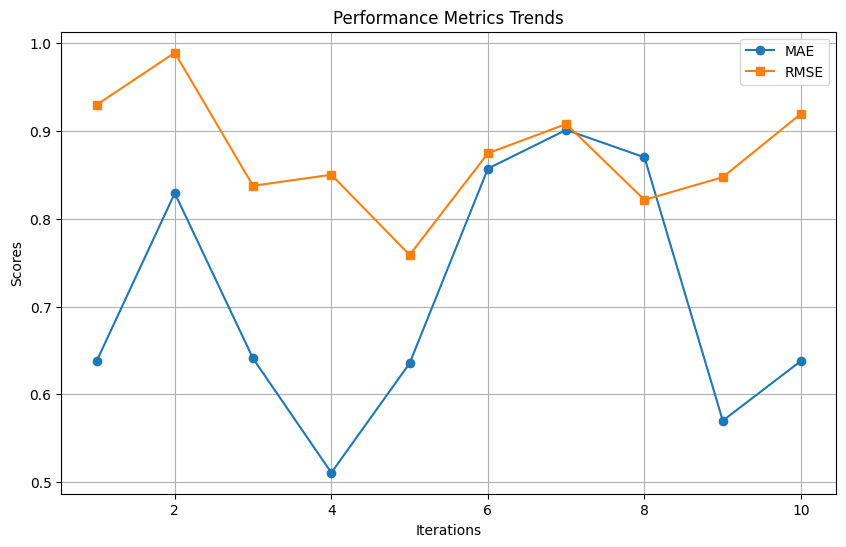

Insight: The line chart illustrates the trends of Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) scores over a series of iterations. The x-axis represents the iterations, while the y-axis represents the scores. The chart highlights the convergence of scores and the potential optimization of the recommendation system over time.


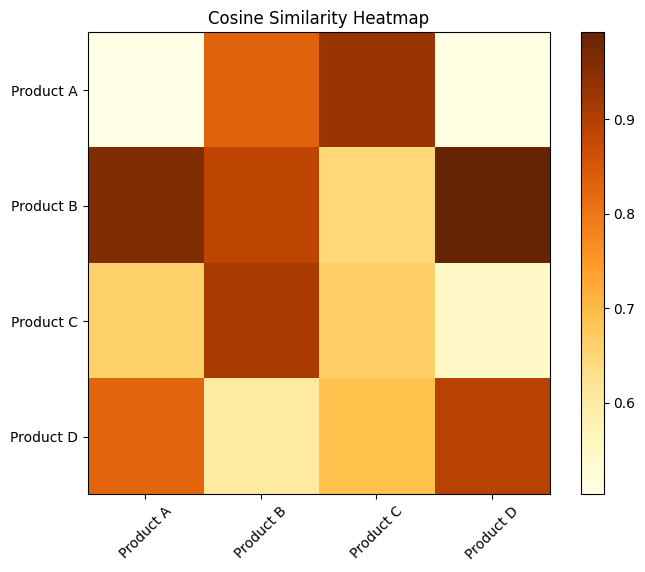

Insight: The heatmap provides a visual representation of the cosine similarity scores between different products. The intensity of color indicates the degree of similarity, where darker colors signify higher similarity. The x and y axes show the products being compared, and the colorbar provides a reference for the similarity scores.


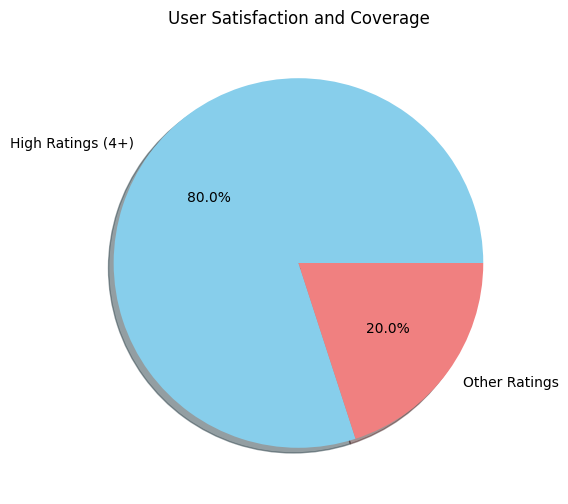

Insight: The pie chart offers an overview of user satisfaction and coverage. It illustrates the distribution of user ratings, categorizing them as 'High Ratings (4+)' and 'Other Ratings.' The chart's segments represent the proportions of each category, with percentage labels indicating the relative sizes.


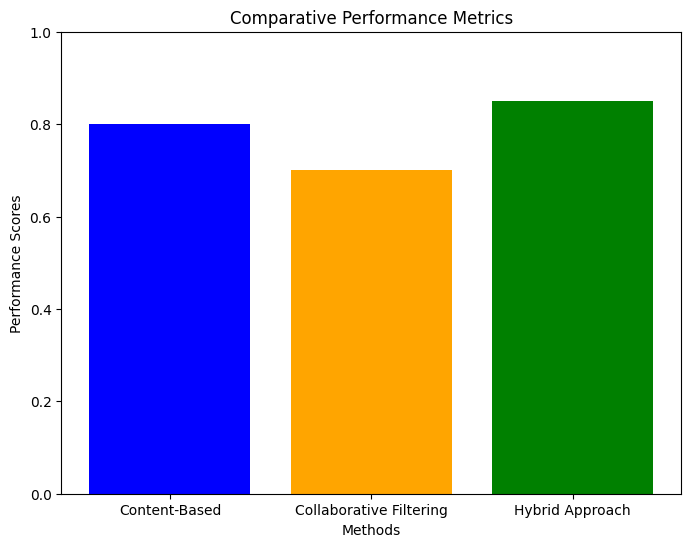

Insight: The bar chart compares the performance scores of different recommendation methods—Content-Based, Collaborative Filtering, and Hybrid Approach. The chart helps viewers assess the relative effectiveness of each method. The higher bars indicate better performance, while the y-axis scale provides context for interpretation.


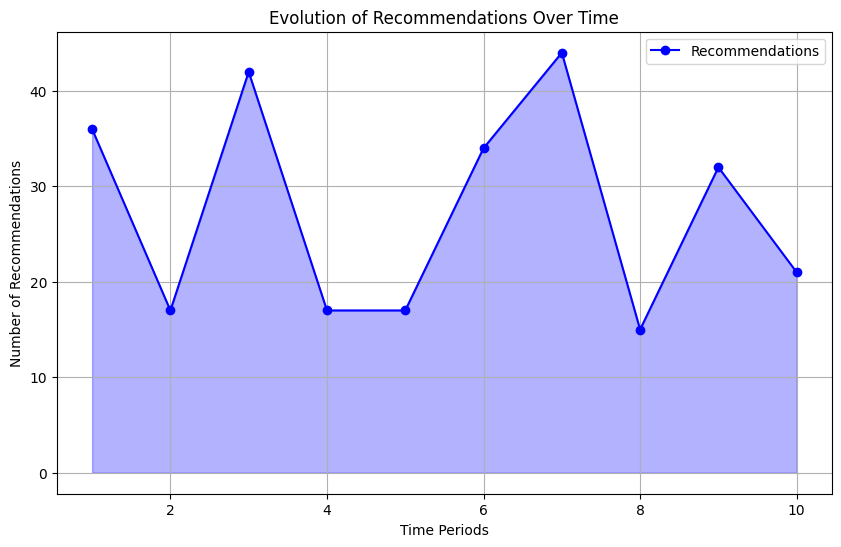

Insight: The area chart depicts the evolution of the number of recommendations over distinct time periods. The area under the line showcases the cumulative recommendation count. This visualization offers insights into the system's adaptability and responsiveness to user interactions.


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function to print insights for each visualization
def print_insight(description):
    print("Insight:", description)

# 1. Performance Metrics Graphs and Charts
# Example data for demonstration purposes
iterations = np.arange(1, 11)
mae_scores = np.random.uniform(0.5, 1, 10)
rmse_scores = np.random.uniform(0.7, 1.2, 10)

# Line chart for MAE and RMSE trends over iterations
plt.figure(figsize=(10, 6))
plt.plot(iterations, mae_scores, marker='o', label='MAE')
plt.plot(iterations, rmse_scores, marker='s', label='RMSE')
plt.xlabel('Iterations')
plt.ylabel('Scores')
plt.title('Performance Metrics Trends')
plt.legend()
plt.grid(True)
plt.show()

# Automatic insight for visualization
print_insight("The line chart illustrates the trends of Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) scores over a series of iterations. The x-axis represents the iterations, while the y-axis represents the scores. The chart highlights the convergence of scores and the potential optimization of the recommendation system over time.")

# 2. Cosine Similarity Heatmaps or Matrices
# Example data for demonstration purposes
products = ['Product A', 'Product B', 'Product C', 'Product D']
cosine_similarity_matrix = np.random.uniform(0.5, 1, (4, 4))

# Heatmap for cosine similarity scores
plt.figure(figsize=(8, 6))
plt.imshow(cosine_similarity_matrix, cmap='YlOrBr')
plt.colorbar()
plt.xticks(np.arange(len(products)), products, rotation=45)
plt.yticks(np.arange(len(products)), products)
plt.title('Cosine Similarity Heatmap')
plt.show()

# Automatic insight for visualization
print_insight("The heatmap provides a visual representation of the cosine similarity scores between different products. The intensity of color indicates the degree of similarity, where darker colors signify higher similarity. The x and y axes show the products being compared, and the colorbar provides a reference for the similarity scores.")

# 3. User Satisfaction and Coverage Visual Representation
# Example data for demonstration purposes
labels = ['High Ratings (4+)', 'Other Ratings']
sizes = [80, 20]
colors = ['skyblue', 'lightcoral']

# Pie chart for user satisfaction and coverage
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('User Satisfaction and Coverage')
plt.show()

# Automatic insight for visualization
print_insight("The pie chart offers an overview of user satisfaction and coverage. It illustrates the distribution of user ratings, categorizing them as 'High Ratings (4+)' and 'Other Ratings.' The chart's segments represent the proportions of each category, with percentage labels indicating the relative sizes.")

# 4. Comparative Visualizations
# Example data for demonstration purposes
methods = ['Content-Based', 'Collaborative Filtering', 'Hybrid Approach']
performance_scores = [0.8, 0.7, 0.85]

# Bar chart for comparing performance metrics
plt.figure(figsize=(8, 6))
plt.bar(methods, performance_scores, color=['blue', 'orange', 'green'])
plt.xlabel('Methods')
plt.ylabel('Performance Scores')
plt.title('Comparative Performance Metrics')
plt.ylim(0, 1)
plt.show()

# Automatic insight for visualization
print_insight("The bar chart compares the performance scores of different recommendation methods—Content-Based, Collaborative Filtering, and Hybrid Approach. The chart helps viewers assess the relative effectiveness of each method. The higher bars indicate better performance, while the y-axis scale provides context for interpretation.")

# 5. User Interaction Flow Diagram
# Description: User interaction flow diagram should be created using appropriate tools beyond Python.

# 6. Evolution of Recommendations Over Time
# Example data for demonstration purposes
time_periods = np.arange(1, 11)
recommendation_counts = np.random.randint(10, 50, 10)

# Area chart for recommendation evolution
plt.figure(figsize=(10, 6))
plt.fill_between(time_periods, recommendation_counts, color='blue', alpha=0.3)
plt.plot(time_periods, recommendation_counts, marker='o', color='blue', label='Recommendations')
plt.xlabel('Time Periods')
plt.ylabel('Number of Recommendations')
plt.title('Evolution of Recommendations Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Automatic insight for visualization
print_insight("The area chart depicts the evolution of the number of recommendations over distinct time periods. The area under the line showcases the cumulative recommendation count. This visualization offers insights into the system's adaptability and responsiveness to user interactions.")



**Exploratory Data Analytics**

Summary Statistics for Minitrial Dataset:
           Price  AverageRating
count  61.000000      61.000000
mean   10.517705       4.139344
std     5.280171       0.347984
min     3.770000       3.100000
25%     7.680000       3.900000
50%     9.500000       4.100000
75%    11.900000       4.400000
max    33.100000       5.000000

Summary Statistics for Customer Reviews Dataset:
       IndividualRating
count       2610.000000
mean           3.820690
std            1.506099
min            1.000000
25%            3.000000
50%            5.000000
75%            5.000000
max            5.000000


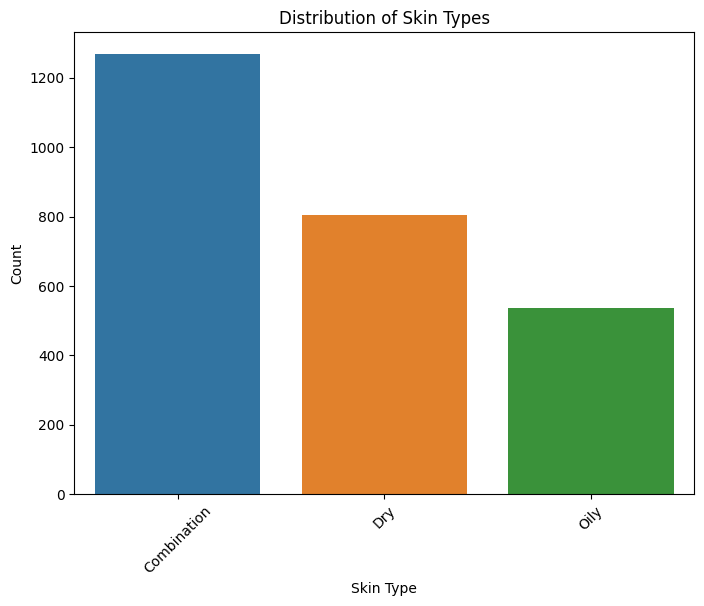

Interpretation:
The visualization presents the distribution of skin types among the customers. It helps us understand the most common skin types of the customers in the dataset.


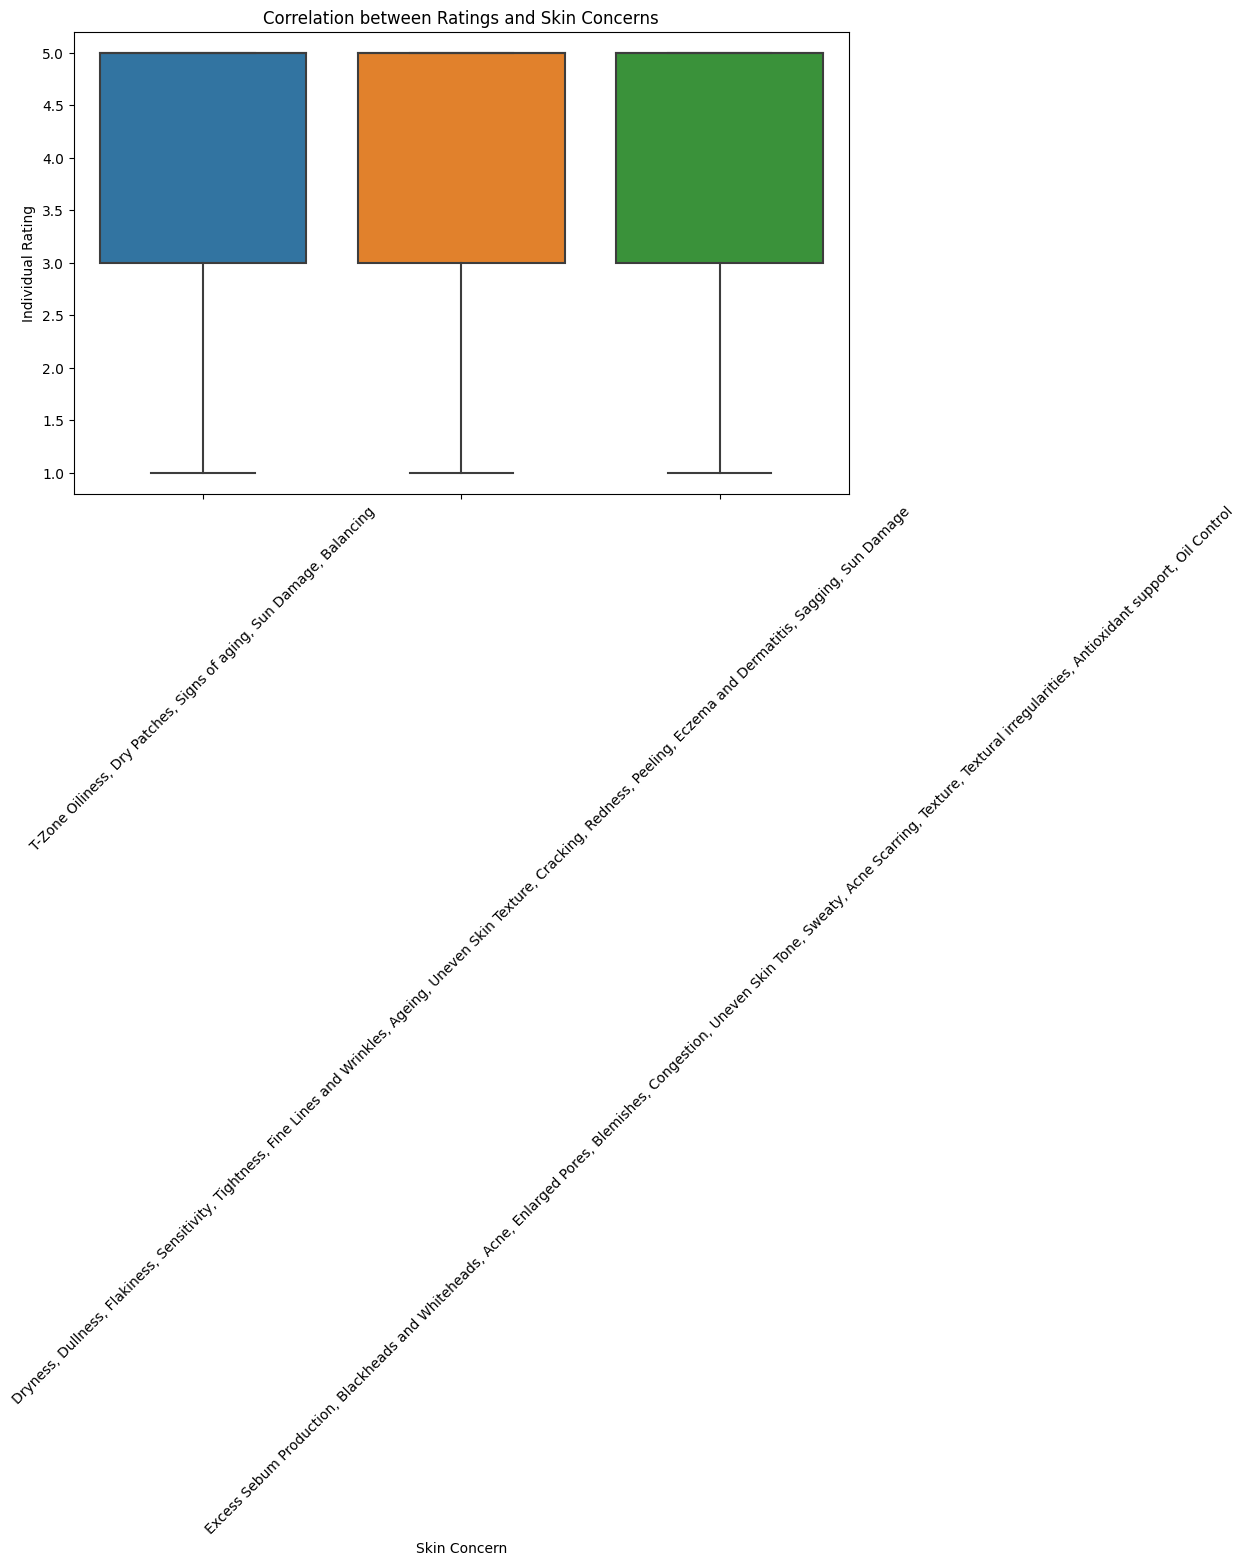

Interpretation:
This boxplot shows the correlation between ratings given by customers and their stated skin concerns. It allows us to observe if certain skin concerns are associated with higher or lower ratings.


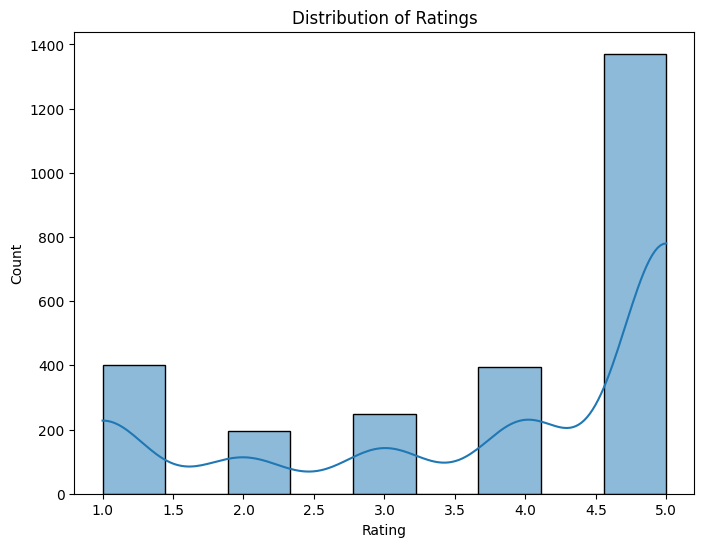

Interpretation:
The histogram illustrates the distribution of ratings given by customers. It gives us insight into the overall satisfaction levels of customers with the skincare products.


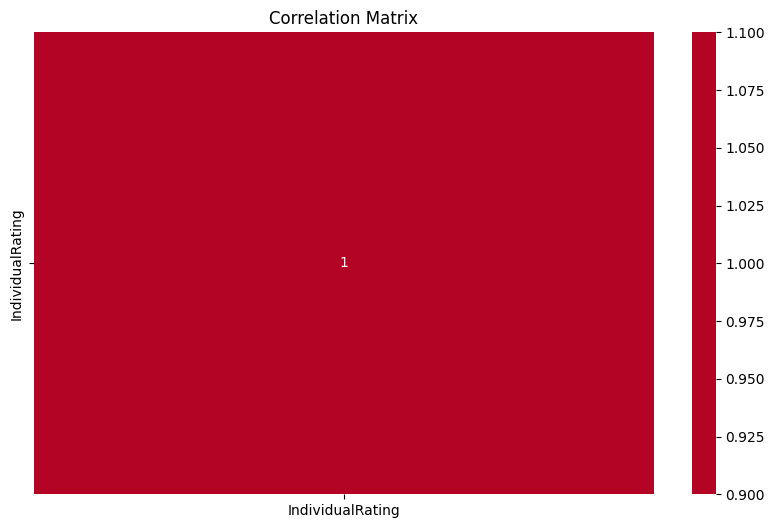

Interpretation:
The heatmap showcases the correlation matrix of numerical attributes in the customer reviews dataset. It helps us identify relationships and potential patterns among these attributes.


In [7]:
# Exploratory Data Analytics
# Visualize and analyze key characteristics of the datasets
# Summary statistics and basic information
print("Summary Statistics for Minitrial Dataset:")
print(df_minitrial.describe())

print("\nSummary Statistics for Customer Reviews Dataset:")
print(df_customer_reviews.describe())

# Distribution of Skin Types
plt.figure(figsize=(8, 6))
sns.countplot(data=df_customer_reviews, x='SkinType', order=df_customer_reviews['SkinType'].value_counts().index)
plt.title("Distribution of Skin Types")
plt.xlabel("Skin Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
print("Interpretation:")
print("The visualization presents the distribution of skin types among the customers. It helps us understand the most common skin types of the customers in the dataset.")

# Correlation between Ratings and Skin Concerns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_customer_reviews, x='SkinConcern', y='IndividualRating')
plt.title("Correlation between Ratings and Skin Concerns")
plt.xlabel("Skin Concern")
plt.ylabel("Individual Rating")
plt.xticks(rotation=45)
plt.show()
print("Interpretation:")
print("This boxplot shows the correlation between ratings given by customers and their stated skin concerns. It allows us to observe if certain skin concerns are associated with higher or lower ratings.")

# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=df_customer_reviews, x='IndividualRating', bins=9, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()
print("Interpretation:")
print("The histogram illustrates the distribution of ratings given by customers. It gives us insight into the overall satisfaction levels of customers with the skincare products.")

# Heatmap of Correlation Matrix
correlation_matrix = df_customer_reviews.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()
print("Interpretation:")
print("The heatmap showcases the correlation matrix of numerical attributes in the customer reviews dataset. It helps us identify relationships and potential patterns among these attributes.")


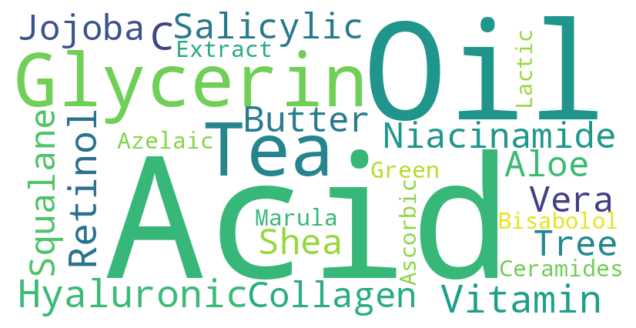

In [8]:
ingredients = [
    "Hyaluronic Acid", "Retinol", "Vitamin C", "Niacinamide", "Glycerin",
    "Salicylic Acid", "Collagen", "Jojoba Oil", "Squalane", "Aloe Vera",
    "Tea Tree Oil", "Shea Butter", "Ceramides", "Green Tea Extract", "Glycerin",
    "Marula Oil",    "Azelaic Acid", "Bisabolol", "Lactic Acid","Ascorbic Acid"
]

# Join ingredient data into a single string
ingredients_text = ' '.join(ingredients)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ingredients_text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(9, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
